<a href="https://colab.research.google.com/github/antonionunnally/Netflix-Data-Project/blob/main/Python/Netflix%20Data%20Analysis/Netflix_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

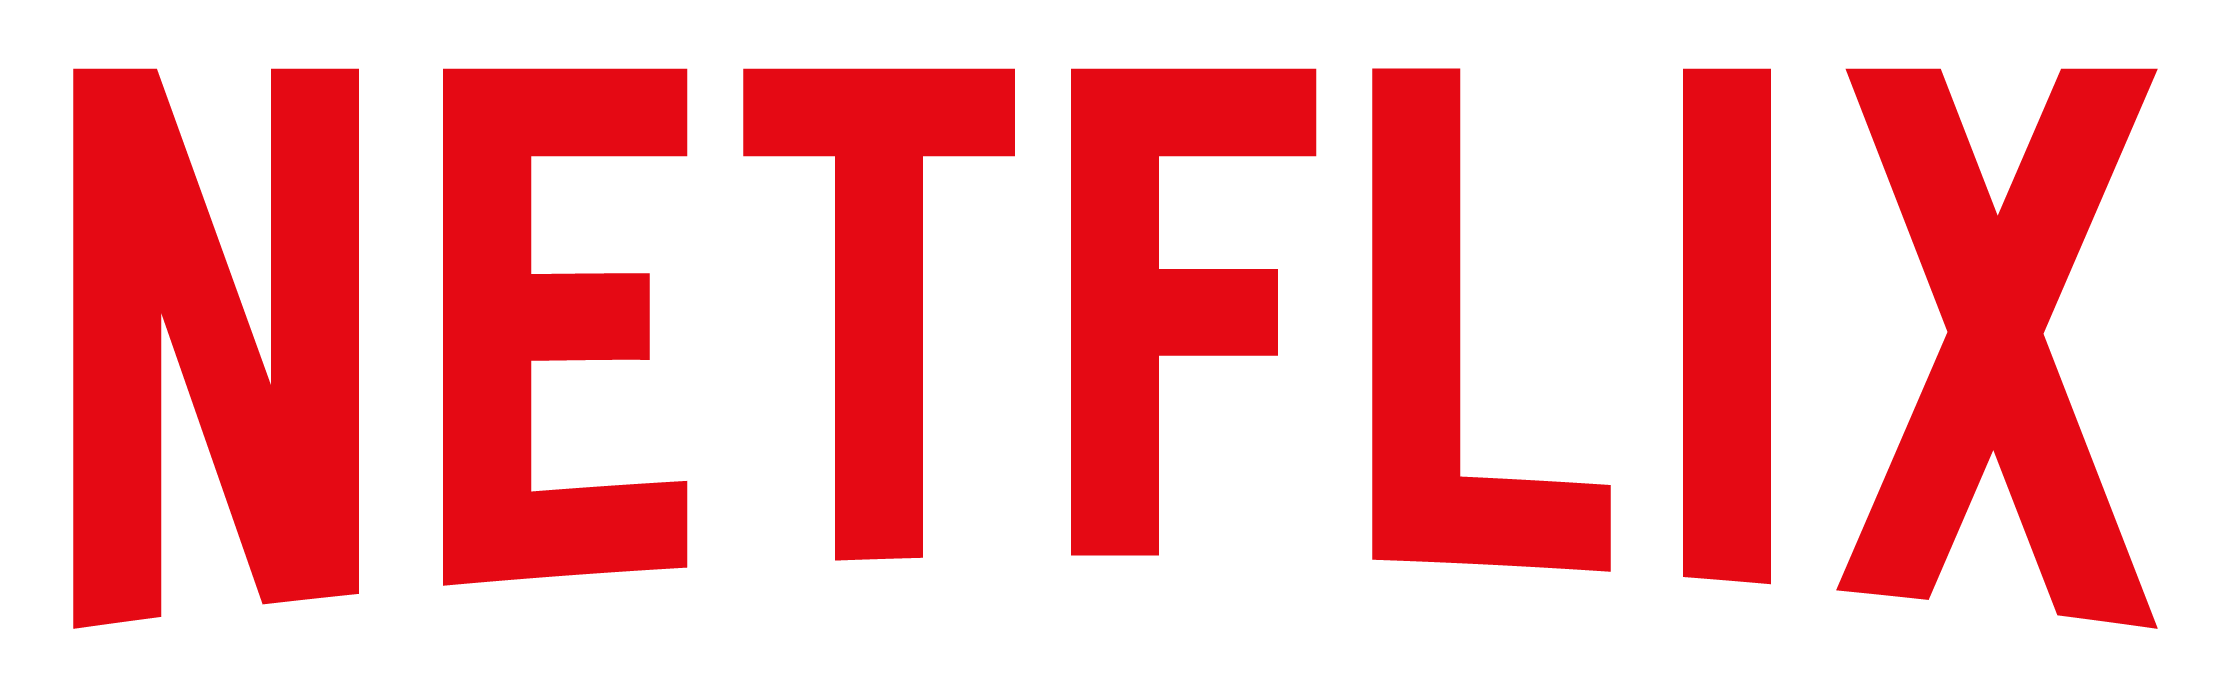

This Netflix dataset has information about the TV shows and Movies that were available in 2021. This dataset is from the Kaggle website.



Section 1 - Google Colab and Python

In [ ]:
from google.colab import files
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np


Section 2 - Getting the data

In [ ]:
fullData = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


In [ ]:

df1 = pd.read_csv(io.BytesIO(fullData['netflix_titles.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
df1.describe

<bound method NDFrame.describe of        show_id  ...                                        description
0     81145628  ...  Before planning an awesome wedding for his gra...
1     80117401  ...  Jandino Asporaat riffs on the challenges of ra...
2     70234439  ...  With the help of three human allies, the Autob...
3     80058654  ...  When a prison ship crash unleashes hundreds of...
4     80125979  ...  When nerdy high schooler Dani finally attracts...
...        ...  ...                                                ...
6229  80000063  ...  This parody of first-person shooter games, mil...
6230  70286564  ...  Marc Maron stars as Marc Maron, who interviews...
6231  80116008  ...  Nursery rhymes and original music for children...
6232  70281022  ...  Set during the Russian Revolution, this comic ...
6233  70153404  ...  This hit sitcom follows the merry misadventure...

[6234 rows x 12 columns]>

Section 3 - Cleaning the Data 


In [ ]:
df1.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
#not related to our analysis
df1.drop(['director','cast'],axis = 1,inplace = True)

#we already have release. year so drop date_added
df1.drop(['date_added'],axis =1,inplace = True)

#all titles appear on netflix US, so replace NaN countries with United States
df1['country'].replace(np.nan, 'United States',inplace  = True)



In [ ]:
df1['rating'].replace(np.nan, 'TV-MA',inplace  = True)

In [ ]:
df1.head()

,show_id,type,title,country,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,United States,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,United States,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,United States,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


# Exploratory Data Analysis




Section 4 - Analyzing the data 


In [ ]:
#QUESTION 1
#1 - In 2018, did netflix release more movies or TV shows?


In [ ]:
#Filter cleaned dataframe for only movies
movies = df1[df1['type'] == 'Movie']

movies.count()

show_id         4265
type            4265
title           4265
country         4265
release_year    4265
rating          4265
duration        4265
listed_in       4265
description     4265
dtype: int64

In [ ]:
#Filter movies dataframe for only 2018. movies - then get the total count
movies2018 = movies[movies['release_year'] == 2018]
movies2018.count()

show_id         646
type            646
title           646
country         646
release_year    646
rating          646
duration        646
listed_in       646
description     646
dtype: int64

In [ ]:
#Filter dataframe for only tv shows
tvShows = df1[df1['type'] == 'TV Show']
tvShows.count()

show_id         1969
type            1969
title           1969
country         1969
release_year    1969
rating          1969
duration        1969
listed_in       1969
description     1969
dtype: int64

In [ ]:
#Filter tvshows dataframe for only 2018 tvshows - then get the total count
tvShows2018 = tvShows[tvShows['release_year'] == 2018]
tvShows2018.count()

show_id         417
type            417
title           417
country         417
release_year    417
rating          417
duration        417
listed_in       417
description     417
dtype: int64

In [ ]:
#QUESTION 2A and 2B

#Whats the most common movie category released?
#What's the most common tv show category?



In [ ]:
movies.listed_in.value_counts() 

Documentaries                                                   299
Stand-Up Comedy                                                 273
Dramas, International Movies                                    248
Dramas, Independent Movies, International Movies                186
Comedies, Dramas, International Movies                          174
                                                               ... 
Comedies, Dramas, Sports Movies                                   1
Action & Adventure, Classic Movies, International Movies          1
Comedies, Music & Musicals, Sports Movies                         1
Action & Adventure, Independent Movies, International Movies      1
Cult Movies, Horror Movies, Thrillers                             1
Name: listed_in, Length: 249, dtype: int64

In [ ]:
tvShows.listed_in.value_counts() 

Kids' TV                                                159
Crime TV Shows, International TV Shows, TV Dramas        92
International TV Shows, TV Dramas                        92
International TV Shows, Romantic TV Shows, TV Dramas     78
Kids' TV, TV Comedies                                    75
                                                       ... 
British TV Shows, Romantic TV Shows, TV Dramas            1
Docuseries, Kids' TV, Science & Nature TV                 1
Classic & Cult TV, TV Dramas, TV Sci-Fi & Fantasy         1
British TV Shows, International TV Shows, TV Horror       1
Classic & Cult TV, Kids' TV, TV Comedies                  1
Name: listed_in, Length: 212, dtype: int64

In [ ]:
movies2018.listed_in.value_counts()

Stand-Up Comedy                                                     57
Documentaries                                                       52
Dramas, Independent Movies, International Movies                    43
Dramas, International Movies                                        27
Comedies, Dramas, International Movies                              26
                                                                    ..
Action & Adventure, Children & Family Movies, Independent Movies     1
Children & Family Movies, Dramas, Faith & Spirituality               1
Action & Adventure, Horror Movies                                    1
Children & Family Movies, Comedies, Romantic Movies                  1
Children & Family Movies, Sci-Fi & Fantasy                           1
Name: listed_in, Length: 114, dtype: int64

In [ ]:
#QUESTION 3A and 3B
#What 5 countries are movies most often released?
#How about for tv shows?


In [ ]:
movies.country.value_counts() 

United States                                                                                               1677
India                                                                                                        724
United Kingdom                                                                                               170
Canada                                                                                                        88
Spain                                                                                                         80
                                                                                                            ... 
Chile, France                                                                                                  1
Denmark, United States                                                                                         1
Denmark, Indonesia, Finland, Norway, United Kingdom, Israel, France, United States, Germany, Net

In [ ]:
tvShows.country.value_counts()

United States                             831
United Kingdom                            178
Japan                                     129
South Korea                               104
Taiwan                                     65
                                         ... 
Germany, Australia                          1
South Korea, France                         1
China, Hong Kong                            1
United States, Ireland, United Kingdom      1
Singapore, United States                    1
Name: country, Length: 154, dtype: int64

In [ ]:
tvShows2018.country.value_counts()

United States                                    193
United Kingdom                                    31
Japan                                             30
India                                             14
South Korea                                       12
                                                ... 
United Kingdom, Canada, United States              1
Finland, France                                    1
United States, Mexico, Spain, Malta                1
Australia, Canada                                  1
United Kingdom, United States, Czech Republic      1
Name: country, Length: 62, dtype: int64

# Data Visualization

Section 5 - Visualizing the data (Matplotlib)

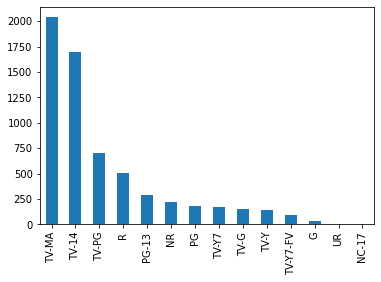

In [ ]:
#visualize the distribution of ratings for all titles?
#matplotlib df1(x - ratings vs y  total)
allRatings = df1.rating.value_counts()
allRatings.plot(kind='bar')

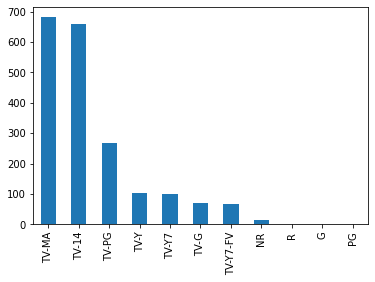

In [ ]:
#visualize the distribution of tv show ratings?
#matplotlib df1 tv shows (x - type vs y  total)
tvRatings = tvShows.rating.value_counts()
tvRatings.plot(kind='bar')